# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [4]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [86]:
#url='http://yustiks.ru/housing.csv'
#s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('housing.csv', delim_whitespace=True, names=names)
#s.head()
#names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



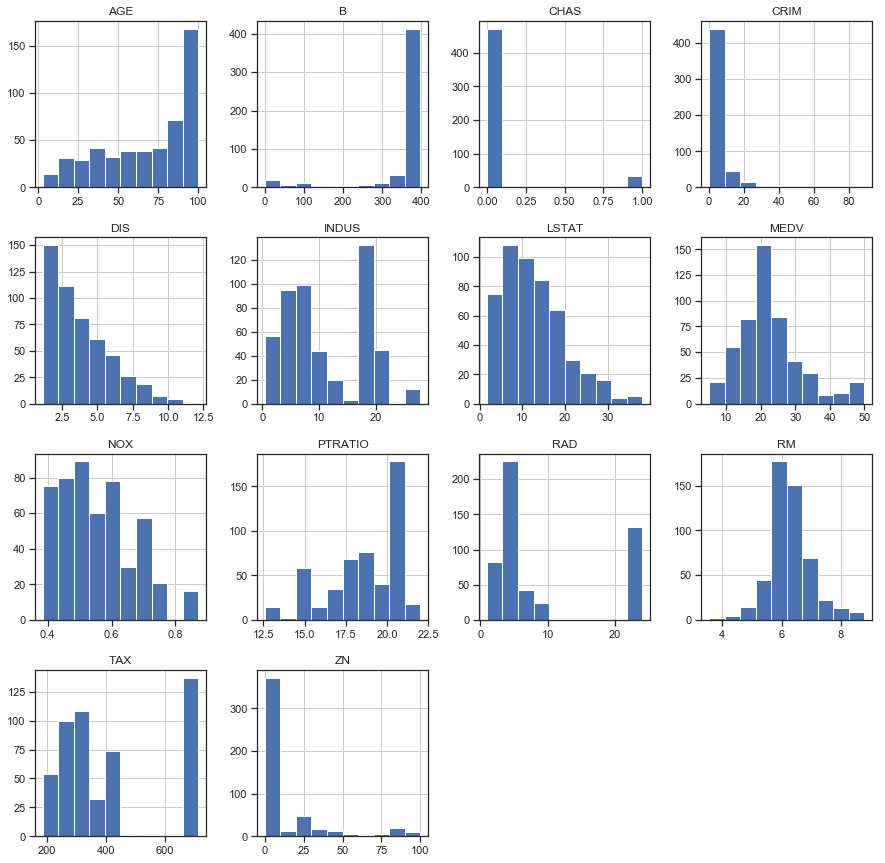

Нормальное - RM
Равномерное - нет
Биноминальное - MEDV наиболее близко, если убрать выбросы справа
Бернулли - RAD
Геометрическое - DIS
Логнормальное - LSTAT


In [89]:
data.hist(figsize=(15,15))
plt.show()

print("Нормальное - RM")
print("Равномерное - нет")
print("Биноминальное - MEDV наиболее близко, если убрать выбросы справа")
print("Бернулли - RAD")
print("Геометрическое - DIS")
print("Логнормальное - LSTAT")


C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


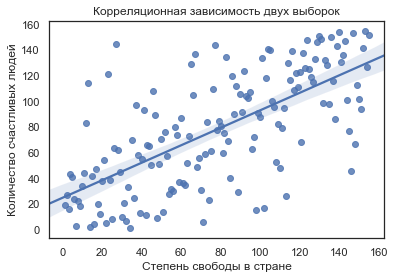

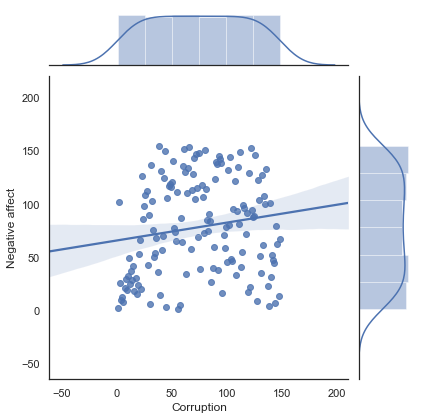

In [18]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
# url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
# df=pd.read_csv(url)
df=pd.read_csv('world-happiness-report-2019.csv')

freedom = df['Freedom']
positive = df['Positive affect']
sns.regplot(x= freedom, y=positive,data=df, fit_reg=True)
plt.xlabel('Степень свободы в стране')
plt.ylabel('Количество счастливых людей')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

corruption = df['Corruption']
negative = df['Negative affect']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=corruption, y=negative, data=df, kind='reg')
plt.show()

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [5]:
df=pd.read_csv('world-happiness-report-2019.csv')
filt_df = df.loc[:, df.columns != 'Country (region)']
np.cov(filt_df)

array([[ 2.89788889e+02,  1.19766667e+02,  4.43333333e+01, ...,
         1.25133333e+02, -8.81777778e+01, -1.77644444e+02],
       [ 1.19766667e+02,  9.09000000e+01,  6.08888889e+01, ...,
        -2.90222222e+01, -1.20444444e+01,  6.42222222e+00],
       [ 4.43333333e+01,  6.08888889e+01,  6.28888889e+01, ...,
        -1.00000000e+01,  8.55555556e+00, -7.77777778e-01],
       ...,
       [ 1.25133333e+02, -2.90222222e+01, -1.00000000e+01, ...,
         1.47960000e+03,  2.94200000e+02, -3.28888889e+00],
       [-8.81777778e+01, -1.20444444e+01,  8.55555556e+00, ...,
         2.94200000e+02,  2.80622222e+02,  3.65533333e+02],
       [-1.77644444e+02,  6.42222222e+00, -7.77777778e-01, ...,
        -3.28888889e+00,  3.65533333e+02,  1.02448889e+03]])

In [146]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [147]:
print('Отсутсвующие значения:')
print(df.isnull().sum())
print('В поле Country нет отсутсвующих значений')

Отсутсвующие значения:
Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64
В поле Country нет отсутсвующих значений


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [152]:
country_count = pd.value_counts(df["Country (region)"].values.ravel())
country_count.count()
#не поняла вопрос про классификацию

156

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

In [6]:
df.dropna(inplace=True)

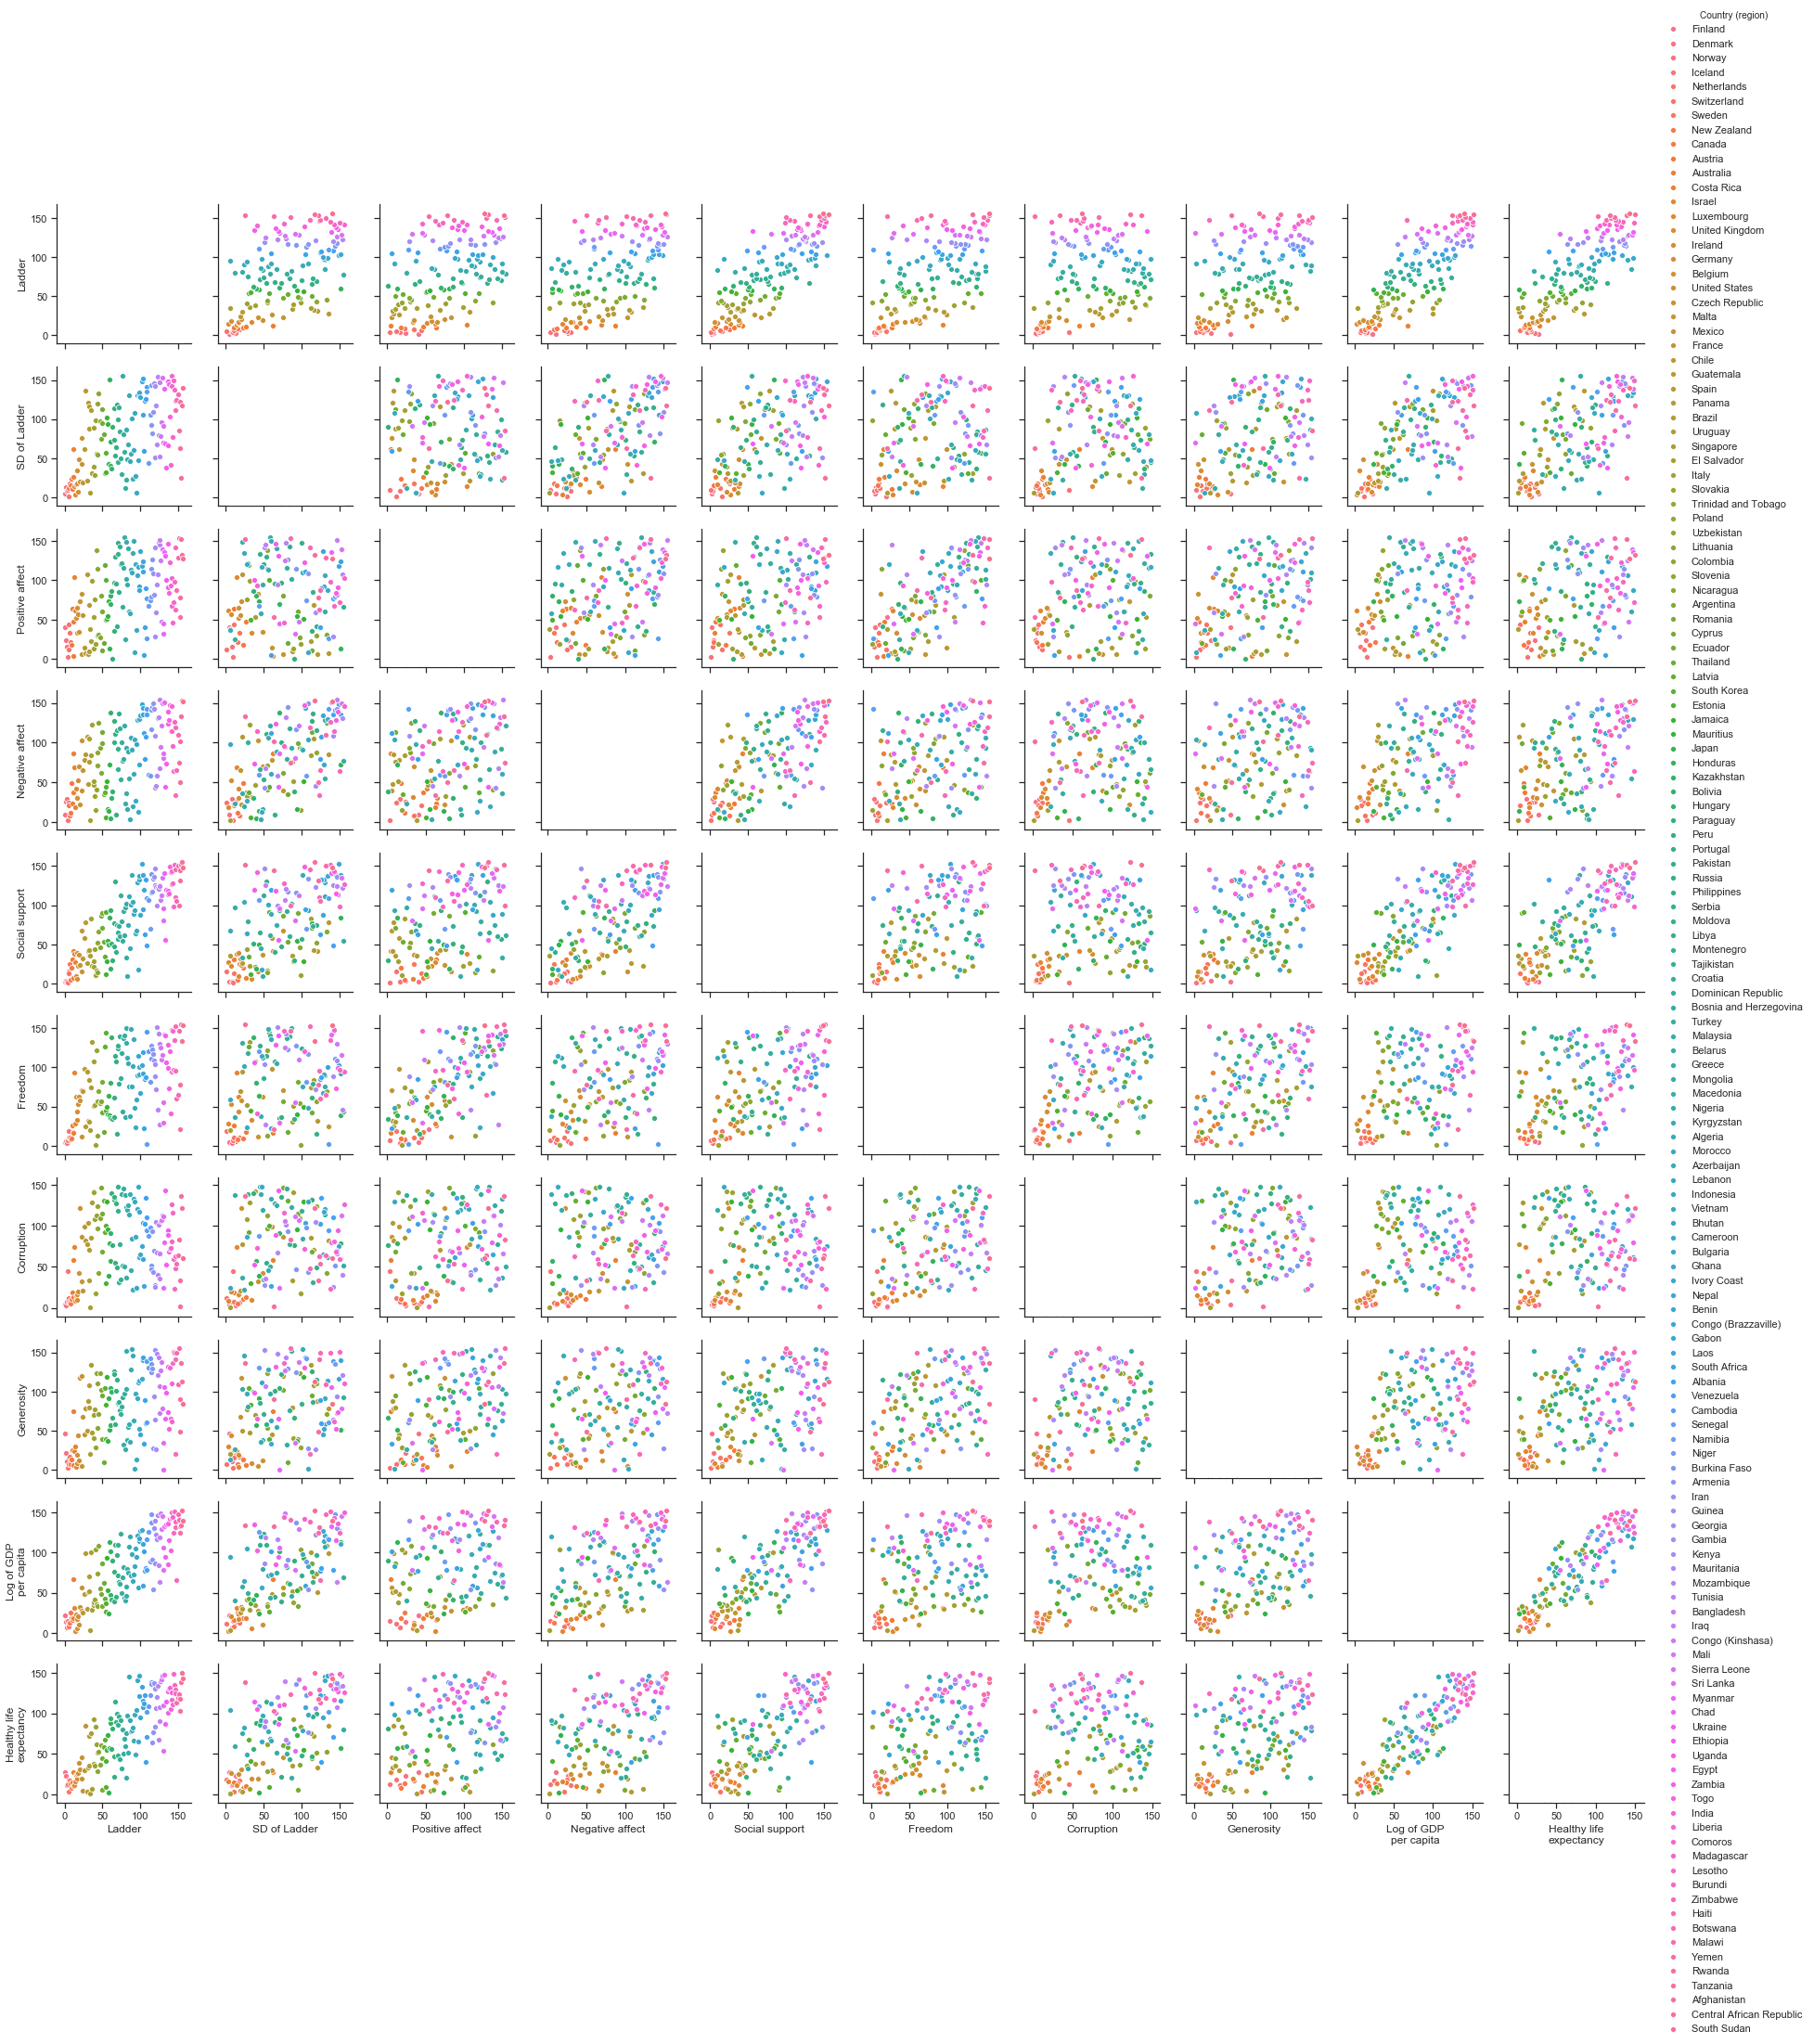

In [7]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(df, hue='Country (region)', diag_kind='hist')
plt.show()

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

                            Ladder  SD of Ladder  Positive affect  \
Ladder                    1.000000      0.555987         0.511870   
SD of Ladder              0.555987      1.000000         0.090332   
Positive affect           0.511870      0.090332         1.000000   
Negative affect           0.539677      0.632734         0.351906   
Social support            0.833412      0.600087         0.433333   
Freedom                   0.546414      0.250246         0.696567   
Corruption                0.224394      0.253344         0.225905   
Generosity                0.485704      0.386337         0.417061   
Log of GDP\nper capita    0.820608      0.663977         0.310843   
Healthy life\nexpectancy  0.826677      0.637554         0.339032   

                          Negative affect  Social support   Freedom  \
Ladder                           0.539677        0.833412  0.546414   
SD of Ladder                     0.632734        0.600087  0.250246   
Positive affect            

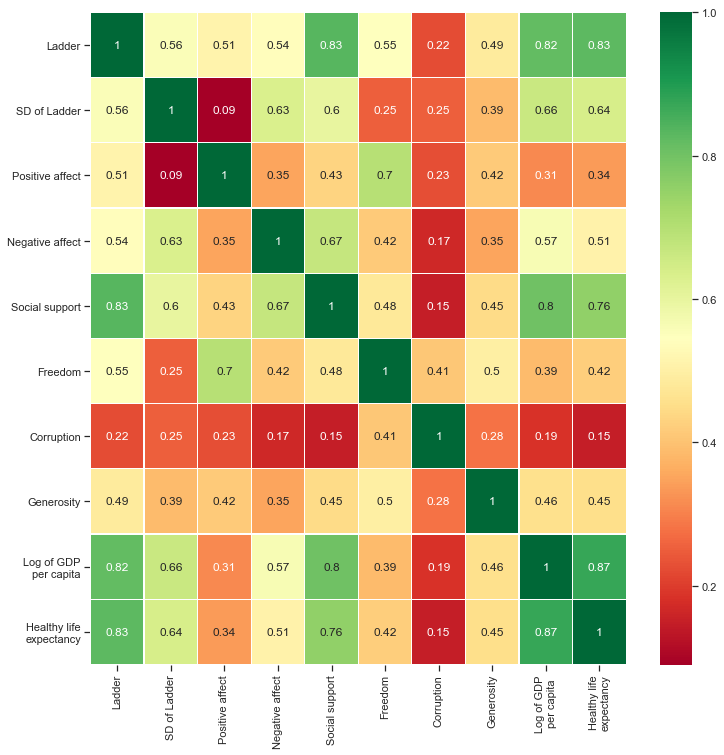

Достаточно сильно коррелируют значения Log of GDP per capita и Healthy life expectancy, Healthy life expectancy и Ladder, Ladder и Social support


In [11]:
matrix = df.corr()
print(matrix)

import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

print ('Достаточно сильно коррелируют значения Log of GDP per capita и Healthy life expectancy, Healthy life expectancy и Ladder, Ladder и Social support')

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


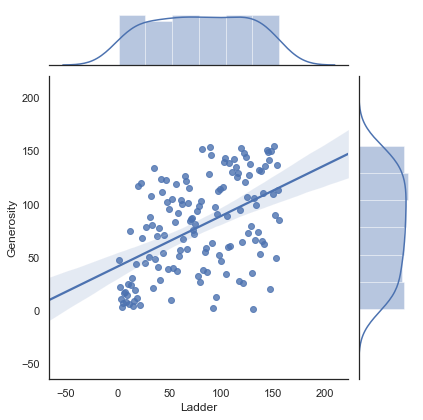

In [17]:
Ladder = df['Ladder']
generosity  = df['Generosity']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=Ladder, y=generosity, data=df, kind='reg')
plt.show()

#Юстина, я не очень поняла вторую часть - Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?
#возможно, я пропустила это в лекции. Поясните, пожалуйста. Заранее спасибо!

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

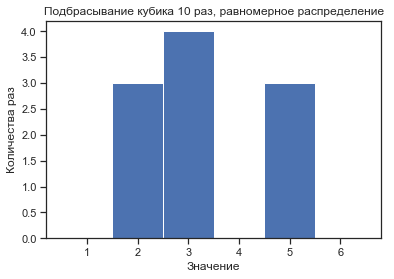

In [49]:
import pylab
import numpy

# Количество испытаний
trials = 10

# Массив значений
values = numpy.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз, равномерное распределение')
pylab.show()

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

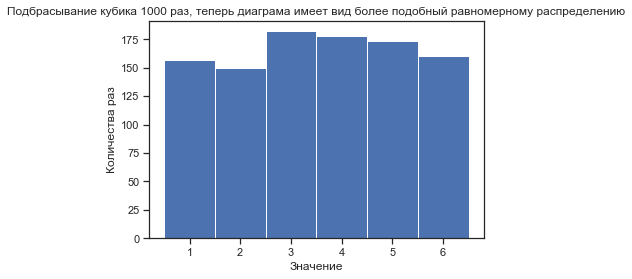

In [51]:
trials = 1000
values = numpy.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз, теперь диаграма имеет вид более подобный равномерному распределению')
pylab.show()

[ 2.54950283  1.025721    3.45238137 ...  4.9963153  11.66267575
  0.99850053]
Среднее значение:  3.9909984745160867


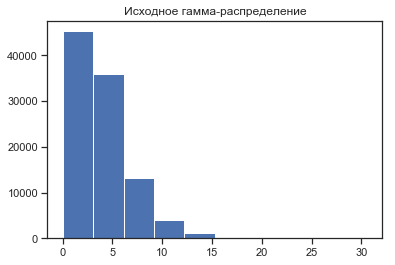

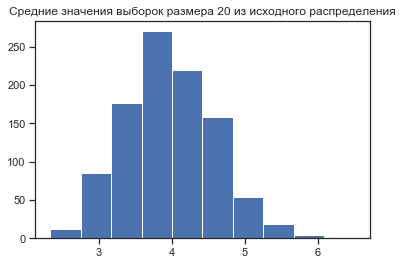

In [57]:
#ЦПТ
import scipy.special as sps
import random

# Создадим выборку из гамма-распределения
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100000)
print(s)
print('Среднее значение: ',np.mean(s))

plt.hist(s)
plt.title('Исходное гамма-распределение')
plt.show()

# Распределение средних значений выборки размера 20 из исходного распределения является нормальным
samples = [ np.mean(random.choices(s, k=20)) for _ in range(1000) ]

plt.hist(samples)
plt.title('Средние значения выборок размера 20 из исходного распределения')
plt.show()